In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
#AF_INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/donor0/"

INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30"
OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro"
DONOR = 1


# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = 0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.utils.dendro_clust import run_dynamic

In [6]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [7]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t", index_col=0)
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,AAACGAACACAGCCAC-1_Flt3l,Flt3l_AAACGAACACAGCCAC-1,0_27,0,Flt3l,0_27,9
Flt3l_AAACGAATCGCTGATA-1,Flt3l,1521,1521,6172,1092,29,21,296,1178,3556,...,3,2029,1760,AAACGAATCGCTGATA-1_Flt3l,Flt3l_AAACGAATCGCTGATA-1,0_19,0,Flt3l,0_19,3
Flt3l_AAACTCGAGATGTTCC-1,Flt3l,1223,1223,4318,548,13,13,212,1050,2482,...,1,1596,1442,AAACTCGAGATGTTCC-1_Flt3l,Flt3l_AAACTCGAGATGTTCC-1,0_1,0,Flt3l,0_1,1
Flt3l_AAACTCGAGTCTCCAA-1,Flt3l,2626,2626,9545,1407,34,25,514,1931,5634,...,1,3373,2791,AAACTCGAGTCTCCAA-1_Flt3l,Flt3l_AAACTCGAGTCTCCAA-1,0_20,0,Flt3l,0_20,1
Flt3l_AAACTCGTCTTACGGA-1,Flt3l,2577,2577,8882,1154,32,19,495,1811,5371,...,4,3144,2629,AAACTCGTCTTACGGA-1_Flt3l,Flt3l_AAACTCGTCTTACGGA-1,0_15,0,Flt3l,0_15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGGCCGTATATGGA-1,Input,7710,7710,38155,13305,118,152,1558,10362,12660,...,2,8630,5610,TTTGGCCGTATATGGA-1_Input,Input_TTTGGCCGTATATGGA-1,1_17,1,Input,1_17,2
Input_TTTGGCCTCGGCTATA-1,Input,6260,6260,33678,10327,133,126,1222,9544,12326,...,7,8038,5343,TTTGGCCTCGGCTATA-1_Input,Input_TTTGGCCTCGGCTATA-1,1_14,1,Input,1_14,7
Input_TTTGTGTAGGTTGTTC-1,Input,3466,3466,28547,5288,99,92,593,16793,5682,...,5,3661,2933,TTTGTGTAGGTTGTTC-1_Input,Input_TTTGTGTAGGTTGTTC-1,1_2,1,Input,1_2,5
Input_TTTGTGTCAAGCCAGA-1,Input,2635,2635,19591,3883,37,67,496,10265,4843,...,2,2945,2326,TTTGTGTCAAGCCAGA-1_Input,Input_TTTGTGTCAAGCCAGA-1,1_27,1,Input,1_27,2


In [8]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

,size,donor
lineage,,
0_1,412,0
0_15,184,0
0_16,178,0
0_17,150,0
0_18,139,0
0_19,125,0
0_20,123,0
0_21,119,0
0_22,112,0


In [9]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR]
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [10]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [11]:
af_indir = INDIR #join(AF_INDIR) #, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t").transpose()
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t").transpose()


### Functions to get mean and median

In [12]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

### Calculate clone-barcode mean

In [13]:
AF_df.head()

,AAACGAACACAGCCAC-1_Flt3l,AAACGAATCGCTGATA-1_Flt3l,AAACTCGAGATGTTCC-1_Flt3l,AAACTCGAGTCTCCAA-1_Flt3l,AAACTCGTCTTACGGA-1_Flt3l,AAACTGCCAAACCTAC-1_Flt3l,AAACTGCCAGTTACAC-1_Flt3l,AAACTGCGTTTGCCCT-1_Flt3l,AAAGATGAGCTACGTT-1_Flt3l,AAAGATGAGGAGAACA-1_Flt3l,...,TTTGAGGCACCGAAAG-1_Input,TTTGAGGGTCATAAGA-1_Input,TTTGCGCAGTGTCGGA-1_Input,TTTGGCCAGAGGAATG-1_Input,TTTGGCCAGCTATCGT-1_Input,TTTGGCCGTATATGGA-1_Input,TTTGGCCTCGGCTATA-1_Input,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCATAGCCAT-1_Input
10559G,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11251G,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11453A,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11719A,0.0,0.0,0.0,0.0,0.0,0.086957,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11812G,0.0,0.0,0.0,0.0,0.0,0.000000,0.181818,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
(AF_df == 0).all().sum()

0

In [15]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df.fillna(0))
mean_af = mean_af.loc[~((mean_af == 0).all(axis=1)),~((mean_af == 0).all(axis=0))]

mean_af

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653
1_19,0.001514,0.003659,0.123123,0.005359,0.013115,0.000000,0.003163,0.002332,0.002462,0.003980,0.005407,0.000000,0.005507,0.003995,0.003790,0.009799,0.001827
1_2,0.001036,0.047726,0.002300,0.002292,0.001808,0.004769,0.000678,0.000805,0.000631,0.000429,0.001381,0.002237,0.002391,0.001176,0.000628,0.001993,0.002323
1_21,0.000110,0.008687,0.006468,0.010305,0.012892,0.000000,0.143714,0.152265,0.003478,0.003273,0.013745,0.000000,0.008979,0.003354,0.004825,0.011356,0.011804
1_23,0.000918,0.002759,0.001348,0.004910,0.088353,0.001897,0.001145,0.001338,0.000620,0.000445,0.002772,0.003692,0.001566,0.000508,0.000471,0.001662,0.002648


In [16]:
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]


In [17]:
anno = mean_af.reset_index()[["lineage"]]

# Remove clones that have all 0
# print('mean_af shape', mean_af.shape)
# mean_af = mean_af.loc[~((mean_af==0).all(axis=1))]
# curr_clones = curr_clones.loc[mean_af.index]
# print('mean_af shape after rm 0', mean_af.shape)


#mean_dp = mean_dp.reset_index(drop=True)
anno_dp = mean_dp.reset_index()[["lineage"]]
na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653
1_19,0.001514,0.003659,0.123123,0.005359,0.013115,0.000000,0.003163,0.002332,0.002462,0.003980,0.005407,0.000000,0.005507,0.003995,0.003790,0.009799,0.001827
1_2,0.001036,0.047726,0.002300,0.002292,0.001808,0.004769,0.000678,0.000805,0.000631,0.000429,0.001381,0.002237,0.002391,0.001176,0.000628,0.001993,0.002323
1_21,0.000110,0.008687,0.006468,0.010305,0.012892,0.000000,0.143714,0.152265,0.003478,0.003273,0.013745,0.000000,0.008979,0.003354,0.004825,0.011356,0.011804
1_23,0.000918,0.002759,0.001348,0.004910,0.088353,0.001897,0.001145,0.001338,0.000620,0.000445,0.002772,0.003692,0.001566,0.000508,0.000471,0.001662,0.002648


In [18]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=mean_af.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [19]:
# mean_af.to_csv(out_f+".initInds.mean.csv")

# curr_clones[["donor","size", "log2_fold","-log10(fold p_adj)", "shuffle_sig", 
#              "ncells"]+ list(curr_labels["condition"].unique())].to_csv(out_f+".initInds.indsMeta.csv")

### Cluster to get dendro results

In [20]:
mean_af

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653
1_19,0.001514,0.003659,0.123123,0.005359,0.013115,0.000000,0.003163,0.002332,0.002462,0.003980,0.005407,0.000000,0.005507,0.003995,0.003790,0.009799,0.001827
1_2,0.001036,0.047726,0.002300,0.002292,0.001808,0.004769,0.000678,0.000805,0.000631,0.000429,0.001381,0.002237,0.002391,0.001176,0.000628,0.001993,0.002323
1_21,0.000110,0.008687,0.006468,0.010305,0.012892,0.000000,0.143714,0.152265,0.003478,0.003273,0.013745,0.000000,0.008979,0.003354,0.004825,0.011356,0.011804
1_23,0.000918,0.002759,0.001348,0.004910,0.088353,0.001897,0.001145,0.001338,0.000620,0.000445,0.002772,0.003692,0.001566,0.000508,0.000471,0.001662,0.002648


In [21]:
if mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 :
    print('no clustering needed only one var')
else:
    g = sns.clustermap(mean_af, row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    curr_clones = curr_clones.iloc[inds]
    plt.close(g.fig)

### Cluster and calculate proper size

In [22]:
mean_af.head()

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653


In [23]:
clusters, link = run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)

distances
[0.09417 0.10221 0.09600 0.30249 0.13014 0.00632 0.21341 0.09486 0.14482
 0.32414 0.13445 0.06566 0.13212 0.10514 0.95918 0.64412 0.11609 0.11172
 0.30750 0.14295 0.09462 0.22107 0.11458 0.15516 0.32208 0.14746 0.09550
 0.14295 0.12037 0.95739 0.64918 0.12286 0.31326 0.15048 0.10384 0.22386
 0.12420 0.16169 0.32433 0.15698 0.10508 0.15012 0.12287 0.95947 0.64807
 0.30442 0.14546 0.09540 0.22305 0.11850 0.15729 0.32239 0.14840 0.09727
 0.14630 0.12546 0.96075 0.65023 0.31795 0.30312 0.35766 0.31092 0.32845
 0.42523 0.32298 0.30388 0.32214 0.31452 0.99966 0.71069 0.12975 0.23682
 0.14367 0.17765 0.33041 0.01246 0.13325 0.17607 0.15427 0.96263 0.65601
 0.21347 0.09764 0.14504 0.32405 0.13380 0.06714 0.13276 0.10606 0.95448
 0.64396 0.22205 0.24417 0.36884 0.24277 0.21609 0.23997 0.22697 0.97810
 0.67810 0.15887 0.32563 0.15261 0.09997 0.15154 0.12905 0.95899 0.64701
 0.33759 0.18253 0.14635 0.18560 0.16898 0.96773 0.65943 0.33420 0.32477
 0.33577 0.32925 1.00549 0.72014 0.13794 

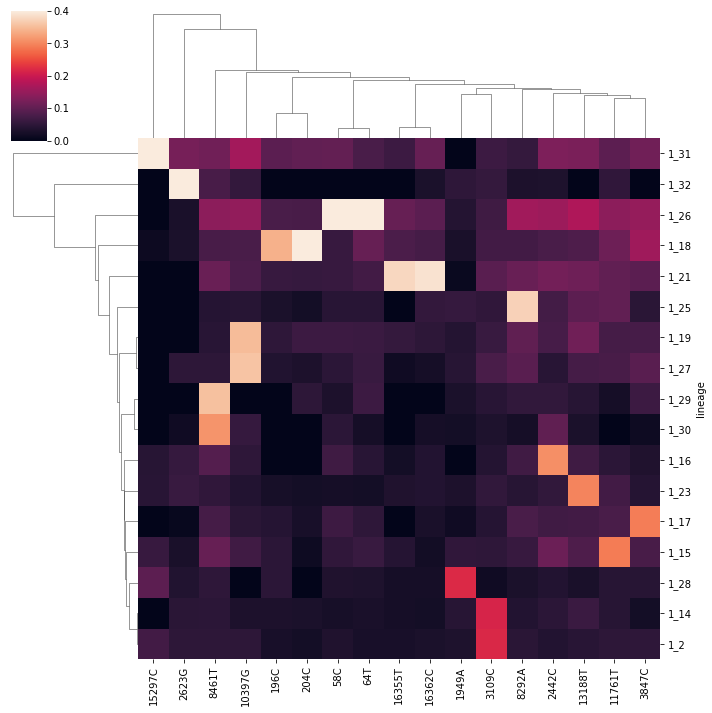

In [24]:
sns.clustermap(np.sqrt(mean_af), row_linkage=link, vmax=0.4)

In [25]:
tmp_den = dc.dendro_cluster(mean_af, g, d_thresh=0.6)
tmp_den

{'icoord': [[65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [90.0, 90.0, 114.84375, 114.84375],
  [70.0, 70.0, 102.421875, 102.421875],
  [55.0, 55.0, 86.2109375, 86.2109375],
  [45.0, 45.0, 70.60546875, 70.60546875],
  [35.0, 35.0, 57.802734375, 57.802734375],
  [25.0, 25.0, 46.4013671875, 46.4013671875],
  [15.0, 15.0, 35.70068359375, 35.70068359375],
  [5.0, 5.0, 25.350341796875, 25.350341796875]],
 'dcoord': [[0.0, 0.012464895120773704, 0.012464895120773704, 0.0],
  [0.0, 0.03136045884724995, 0.03136045884724995, 0.0],
  [0.0, 0.0063184756462880435, 0.0063184756462880435, 0.0],
  [0.0, 0.06639974538271647, 0.06639974538271647, 0.0063184756462880435],
  [0.0, 0.09476524708623503, 0.09476524708623503, 0.06639974538271647],
  [0.0, 0.10009569788375264, 0.10009569788375264, 0.0

In [26]:
curr_clones

,size,donor
lineage,,
1_31,38,1
1_32,17,1
1_26,77,1
1_18,121,1
1_21,112,1
1_25,90,1
1_19,119,1
1_27,79,1
1_29,53,1


In [27]:
%matplotlib inline
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):

    den = dc.dendro_cluster(mean_af, g, d_thresh=0.6)

    clusters, link = run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)
    
    curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
    
#     if verbose:
#         print('icoord and color list')
#         print(len(den["icoord"]))
#         print(len(den["color_list"]))
#         print('leaves leaves color and mean_af shape')
#         print(len(den["leaves"]))
#         print(len(den["leaves_color_list"]))
#         print(mean_af.shape)

#     # cluster_classes = dc.get_cluster_classes(den)
#     curr_clones = dc.add_cluster_labels(den,curr_clones)
#     curr_clones

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_af.index]

    # with open(out_f + ".dendrogram_pvals.txt", "w") as f:
    #     #for l in size_pvals:
    #     f.write("\n".join(size_pvals))

    curr_clones


distances
[0.09417 0.10221 0.09600 0.30249 0.13014 0.00632 0.21341 0.09486 0.14482
 0.32414 0.13445 0.06566 0.13212 0.10514 0.95918 0.64412 0.11609 0.11172
 0.30750 0.14295 0.09462 0.22107 0.11458 0.15516 0.32208 0.14746 0.09550
 0.14295 0.12037 0.95739 0.64918 0.12286 0.31326 0.15048 0.10384 0.22386
 0.12420 0.16169 0.32433 0.15698 0.10508 0.15012 0.12287 0.95947 0.64807
 0.30442 0.14546 0.09540 0.22305 0.11850 0.15729 0.32239 0.14840 0.09727
 0.14630 0.12546 0.96075 0.65023 0.31795 0.30312 0.35766 0.31092 0.32845
 0.42523 0.32298 0.30388 0.32214 0.31452 0.99966 0.71069 0.12975 0.23682
 0.14367 0.17765 0.33041 0.01246 0.13325 0.17607 0.15427 0.96263 0.65601
 0.21347 0.09764 0.14504 0.32405 0.13380 0.06714 0.13276 0.10606 0.95448
 0.64396 0.22205 0.24417 0.36884 0.24277 0.21609 0.23997 0.22697 0.97810
 0.67810 0.15887 0.32563 0.15261 0.09997 0.15154 0.12905 0.95899 0.64701
 0.33759 0.18253 0.14635 0.18560 0.16898 0.96773 0.65943 0.33420 0.32477
 0.33577 0.32925 1.00549 0.72014 0.13794 

In [28]:
curr_clones

,size,donor,den_clust
lineage,,,
1_14,150,1,C1
1_15,153,1,C1
1_16,138,1,C1
1_17,140,1,C1
1_18,121,1,C1
1_19,119,1,C1
1_2,296,1,C1
1_21,112,1,C1
1_23,111,1,C1


## Group clones using dendrogram and run stats on size differences in the groups

### Run ranksums on clone size btwn debdrogram clusters

In [29]:
# size_pvals = []
# for pair in combinations(curr_clones["den_clust"].unique(),2):
#     print(pair)
#     stat, p_val = scipy.stats.ranksums(curr_clones.loc[curr_clones["den_clust"]==pair[0], "size"].values, 
#                          y=curr_clones.loc[curr_clones["den_clust"]==pair[1], "size"].values, 
#                          alternative='two-sided')

#     size_pvals.append(f"{pair[0]}, {pair[1]}, {str(p_val)}")
    


## Plot with dendro clusters

In [30]:
conditions = cells_meta["condition"].unique()

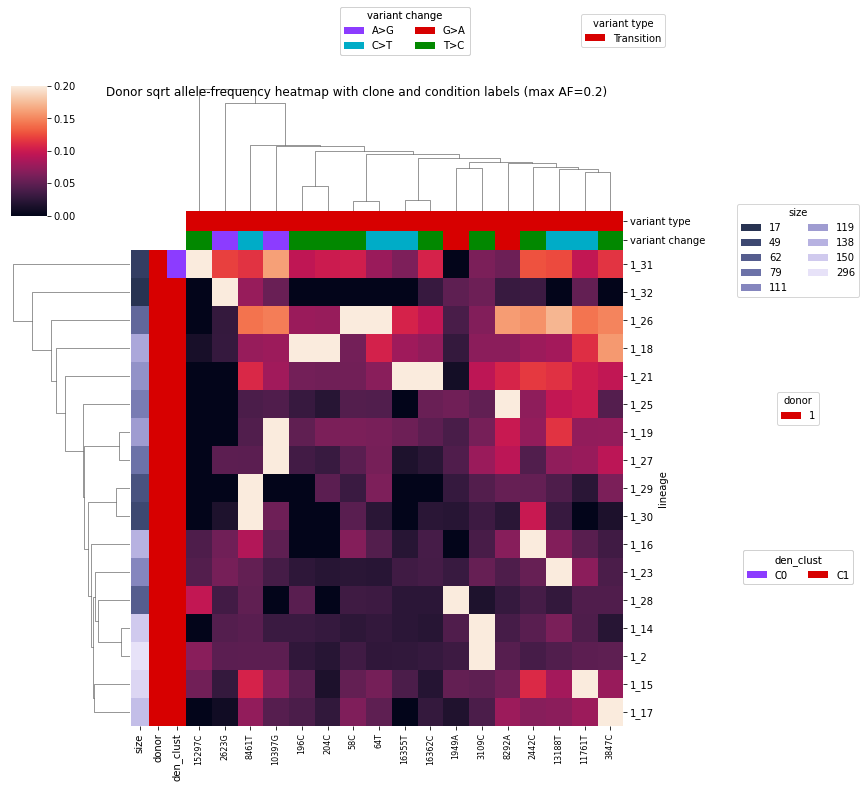

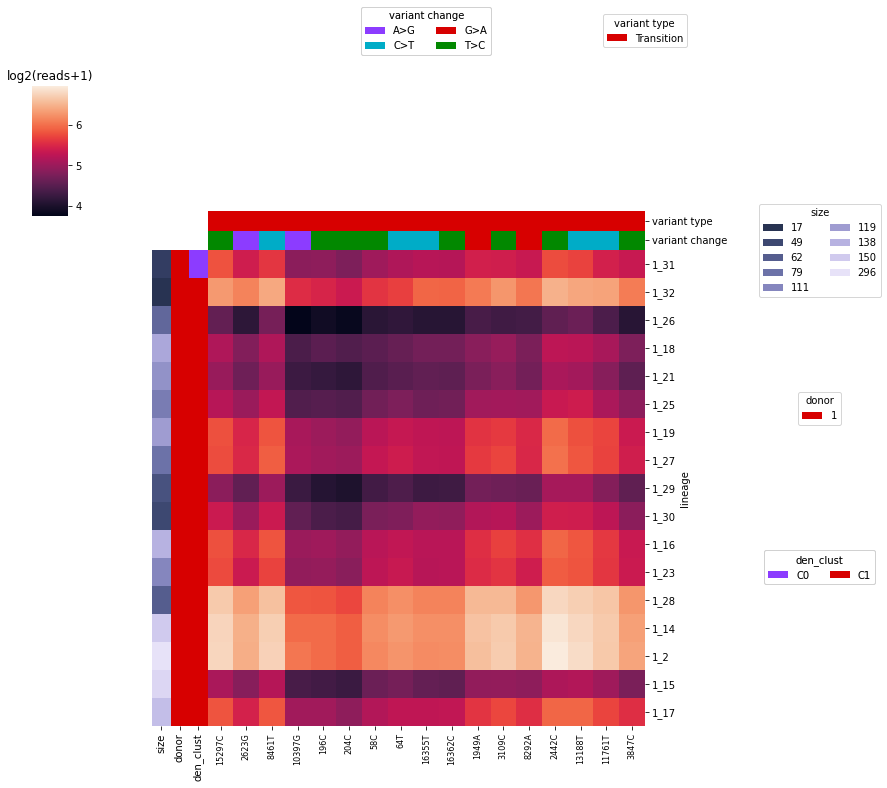

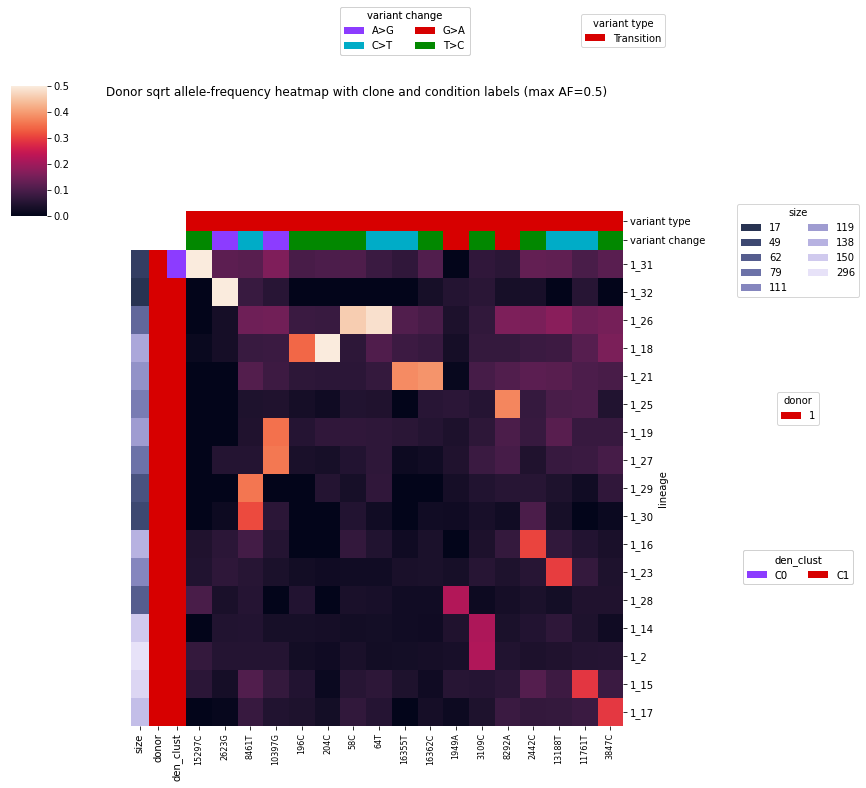

In [31]:
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    g = ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                        row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                        vmax=0.2, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max2.AF.png",to_pdf=False)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                         )
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f+".dendro.NoCondition.DP.png")#, f=g1d.figure)


    mean_af = mean_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_af.index]

    ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max5.AF.png",to_pdf=False)



In [32]:
out_f

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro/donor1'

### Save mean_af and curr_clonnes

In [33]:

mean_af.to_csv(out_f+".mean.csv")
curr_clones.to_csv(out_f+".clones_dendro.csv")

In [34]:
out_f

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro/donor1'